# Notebook for Topic 3 - Parameters

<hr style="border-top: 1px solid #001a79;" />

## Exercise 1

*Use numpy's polyfit to fit polynomials to the following two data sets.*

*Data Set 1:*

*x1 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]*<br>
*y1 = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]*

*Data Set 2:*

*x2 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]*<br>
*y2 = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]*

___

In [1]:
# Import all used libraries

import math

# Numpy for numerical arrays
import numpy as np

# matplotlib for plots
import matplotlib.pyplot as plt

# import curve fitting function from SciPy
from scipy.optimize import curve_fit

## Fit Data Set 1

In [2]:
# Define values for Data Set 1:
x1 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
y1 = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]

#### Plot Data Set 1

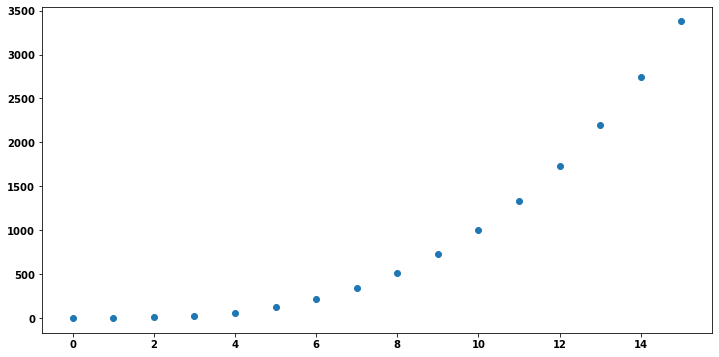

In [3]:
# Create a plot to visualize Data Set 1
fig, ax = plt.subplots(figsize=(12,6))

# Plot x1 vs y1:
ax.scatter(x1, y1);

From the plot above, the function appears to be a quadratic: $y=ax^2+bx+c$

#### Fitting Data Set 1 to Quadratic function $y=ax^2+bx+c$

In [4]:
# Degree of the polynomial is 2: quadratic function
deg = 2
params1 = np.polyfit(x1, y1, deg)

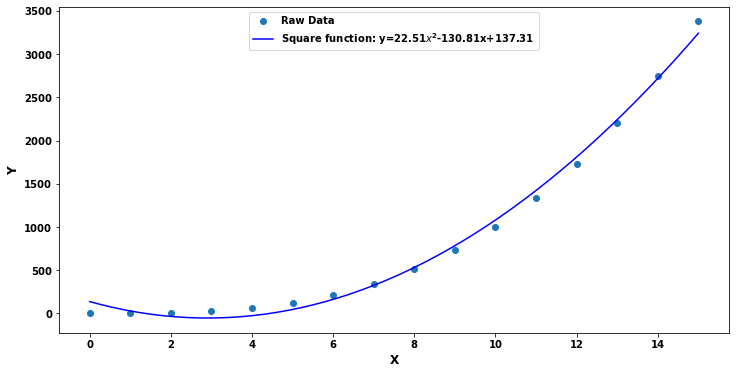

In [5]:
# Create a plot to visualize Data Set 1 with 2nd degree polynomial fit 
fig, ax = plt.subplots(figsize=(12,6))

# create x values for plot
x = np.linspace(min(x1), max(x1), 50)


# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)


# Plot Data Set 1 points:
ax.scatter(x1, y1, label="Raw Data");

# Plot quadratic function fit for Data Set 1:
ax.plot(x, params1[0] * x*x + params1[1] * x + params1[2], 'b-', 
        label='Square function: y={:.2f}$x^2${:.2f}x+{:.2f}'.format(params1[0], params1[1], params1[2])
       );

# Add the legend
plt.legend(loc='upper center');

Square function doesn't seems to fit Data Set 1 too well. Below I will try fitting data using higher order polynomials

#### Fitting Data Set 1 to higher degree polynomials $y=ax^3+bx^2+cx+d$ and $y=ax^4+bx^3+cx^2+dx+e$

In [6]:
# Trying 3rd degree polynomial (y=a*x^3+b*x^2+c*x+d)
params3 = np.polyfit(x1, y1, 3, full=True)

# Values returned by Polyfit as per [1][2]
print('\nCubic function: y={:.3f}x^3+{:.3f}x^2+{:.3f}x+{:.3f}'.format(*params3[0]))
print('Array containing the residuals of the fit: {}'.format(params3[1]))
print('Number of iterations performed by the fitting algorithm: {}'.format(params3[2]))
print('Final sum of squared residuals of the fit: {}\n'.format(params3[4]))


Cubic function: y=0.997x^3+0.078x^2+-0.504x+1.223
Array containing the residuals of the fit: [13.21477911]
Number of iterations performed by the fitting algorithm: 4
Final sum of squared residuals of the fit: 3.552713678800501e-15



In [7]:
# Trying 4th degree polynomial (y=a*x^4+b*x^3+c*x^2+d*x+e)
params4 = np.polyfit(x1, y1, 4, full=True)

# Values returned by Polyfit as per [1][2]
print('\nBi-quadratic function: y={:.3f}x^4+{:.3f}x^3+{:.3f}x^2{:.3f}x+{:.3f}'.format(*params4[0]))
print('Array containing the residuals of the fit: {}'.format(params4[1]))
print('Number of iterations performed by the fitting algorithm: {}'.format(params4[2]))
print('Final sum of squared residuals of the fit: {}\n'.format(params4[4]))


Bi-quadratic function: y=-0.000x^4+0.999x^3+0.060x^2-0.448x+1.193
Array containing the residuals of the fit: [13.20922675]
Number of iterations performed by the fitting algorithm: 5
Final sum of squared residuals of the fit: 3.552713678800501e-15



<div class="alert alert-block alert-info">
    Both outputs of the polyfit function for the cubic and fourth degree polynomial fits are similar. The residual sum of squares are similar in both outputs, indicating that both fits have similar accuracy.
<div>    

#### Plot Data Set 1 with fitted functions

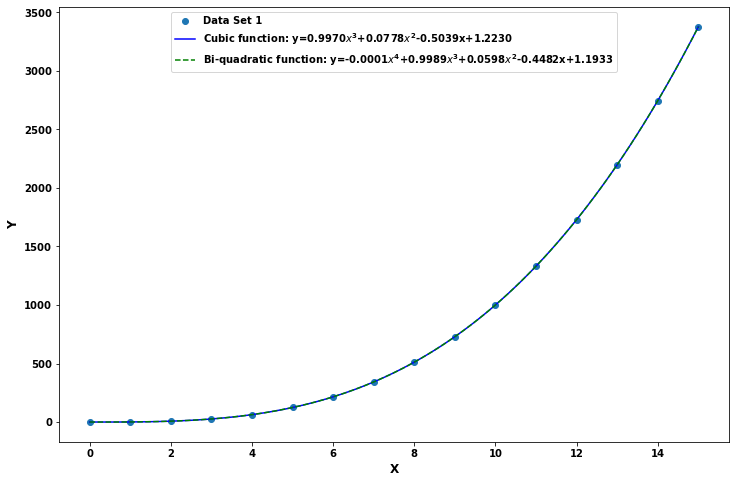

In [8]:
# Create a plot to visualize Data Set 1 with 3rd and 4th degree polynomial fit
fig, ax = plt.subplots(figsize=(12,8))

# create x values for plot
x = np.linspace(min(x1), max(x1), 100)


# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)


# Plot Data Set 1 points:
ax.scatter(x1, y1, label="Data Set 1");

# Plot cubic function fit for Data Set 1:
ax.plot(x, np.polyval(params3[0], x), 'b-', 
        label='Cubic function: y={:.4f}$x^3$+{:.4f}$x^2${:.4f}x+{:.4f}'.format(*params3[0])
       );

# Plot bi-quadratic function fit for Data Set 1:
ax.plot(x, np.polyval(params4[0], x), 'g--',
        label='Bi-quadratic function: y={:.4f}$x^4$+{:.4f}$x^3$+{:.4f}$x^2${:.4f}x+{:.4f}'.format(*params4[0])
       );

# Add the legend
plt.legend(loc='upper center');

<div class="alert alert-block alert-success">
Both, cubic and bi-quadratic functions seems to be fitting the Data Set reasonably well, but since cubic function is simplier (A fit with a high number of parameters may be overfitting the data) and parameter for $x^4$ in bi-quadratic function is close to 0, better fitting function for the Data Set 1 is the cubic function:
    

$$y=0.997x^3+0.078x^2-0.504x+1.223$$
</div>

___
## Fit Data Set 2

In [9]:
# Define values for Data Set 2:
x2 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
y2 = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]

#### Plot Data Set 2

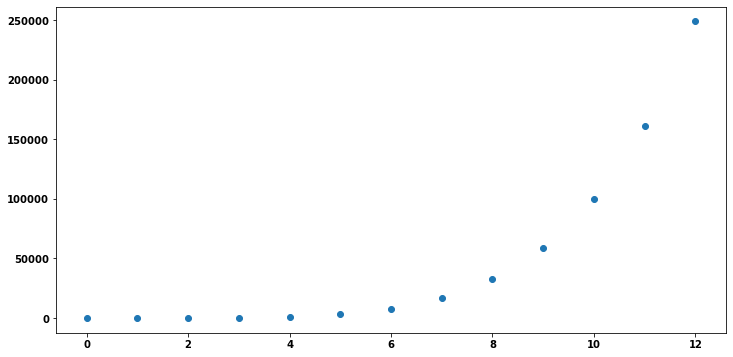

In [10]:
# Create a plot to visualize Data Set 2
fig, ax = plt.subplots(figsize=(12,6))

# Plot x2 vs y2:
ax.scatter(x2, y2);

Simirarly to Data Set 1, this dataset is not linear and can either be fited with one of the Polynomial functions or exponential function. We'll try polynomial functions first (up to 4th degree).

In [11]:
params4

(array([-6.33831468e-05,  9.98895157e-01,  5.98405126e-02, -4.48197570e-01,
         1.19332430e+00]),
 array([13.20922675]),
 5,
 array([2.10484675, 0.71872765, 0.22594421, 0.04441018, 0.00525949]),
 3.552713678800501e-15)

In [12]:
# Trying quadratic function (y=a*x^2+b*x+c)
params2 = np.polyfit(x2, y2, 2, full=True)

print('\nQuadratic function: y={:.3f}x^2+{:.3f}x+{:.3f}'.format(*params2[0]))
print('Array containing the residuals of the fit: {}'.format(params2[1]))
print('Number of iterations performed by the fitting algorithm: {}'.format(params2[2]))
print('Final sum of squared residuals of the fit: {}\n'.format(params2[4]))


Quadratic function: y=3218.546x^2+-22394.365x+22021.099
Array containing the residuals of the fit: [3.55948436e+09]
Number of iterations performed by the fitting algorithm: 3
Final sum of squared residuals of the fit: 2.886579864025407e-15



In [13]:
# Trying 3rd degree polynomial (y=a*x^3+b*x^2+c*x+d)
params3 = np.polyfit(x2, y2, 3, full=True)

print('\nCubic function: y={:.3f}x^3+{:.3f}x^2+{:.3f}x+{:.3f}'.format(*params3[0]))
print('Array containing the residuals of the fit: {}'.format(params3[1]))
print('Number of iterations performed by the fitting algorithm: {}'.format(params3[2]))
print('Final sum of squared residuals of the fit: {}\n'.format(params3[4]))


Cubic function: y=404.999x^3+-4071.444x^2+11220.589x+-4708.865
Array containing the residuals of the fit: [1.81890793e+08]
Number of iterations performed by the fitting algorithm: 4
Final sum of squared residuals of the fit: 2.886579864025407e-15



In [14]:
# Trying 4th degree polynomial (y=a*x^4+b*x^3+c*x^2+d*x+e)
params4 = np.polyfit(x2, y2, 4, full=True)

print('\nBi-quadratic function: y={:.3f}x^4+{:.3f}x^3+{:.3f}x^2{:.3f}x+{:.3f}'.format(*params4[0]))
print('Array containing the residuals of the fit: {}'.format(params4[1]))
print('Number of iterations performed by the fitting algorithm: {}'.format(params4[2]))
print('Final sum of squared residuals of the fit: {}\n'.format(params4[4]))


Bi-quadratic function: y=30.003x^4+-315.075x^3+1350.546x^2-1997.922x+383.091
Array containing the residuals of the fit: [1820611.31403512]
Number of iterations performed by the fitting algorithm: 5
Final sum of squared residuals of the fit: 2.886579864025407e-15



<div class="alert alert-block alert-info">
The 4th degree polynomial has the lowest squared residual which indicates that it could be fitting the data the best. However, it is also important to consider the complexity of the fit and the number of parameters used. A fit with a lower sum of squared residuals but a high number of parameters may be overfitting the data. It is generally advisable to use the simplest model that provides a satisfactory fit to the data.
</div>

#### Plot Data Set 2 with fitted functions

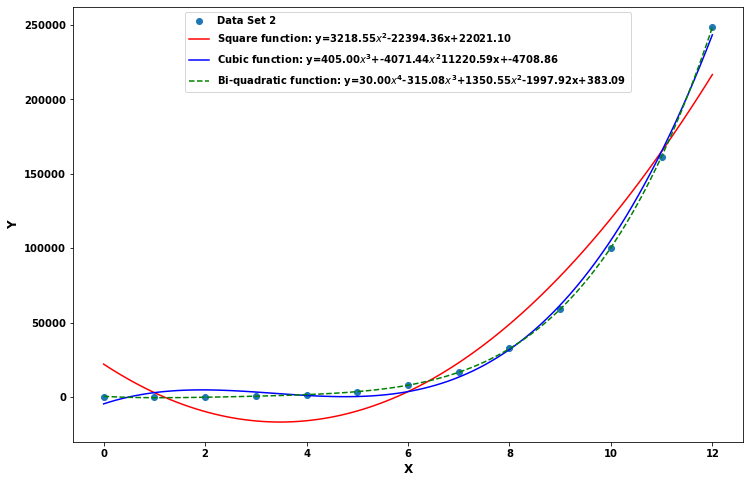

In [15]:
# Create a plot to visualize Data Set 1 with 3rd and 4th degree polynomial fit
fig, ax = plt.subplots(figsize=(12,8))

# create x values for plot
x = np.linspace(min(x2), max(x2), 100)


# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)


# Plot Data Set 1 points:
ax.scatter(x2, y2, label="Data Set 2");

# Plot cubic function fit for Data Set 1:
ax.plot(x, np.polyval(params2[0], x), 'r-',
        label='Square function: y={:.2f}$x^2${:.2f}x+{:.2f}'.format(*params2[0])
       );

# Plot cubic function fit for Data Set 1:
ax.plot(x, np.polyval(params3[0], x), 'b-',
        label='Cubic function: y={:.2f}$x^3$+{:.2f}$x^2${:.2f}x+{:.2f}'.format(*params3[0])
       );

# Plot bi-quadratic function fit for Data Set 1:
ax.plot(x, np.polyval(params4[0], x), 'g--',
        label='Bi-quadratic function: y={:.2f}$x^4${:.2f}$x^3$+{:.2f}$x^2${:.2f}x+{:.2f}'.format(*params4[0])
       );

# Add the legend
plt.legend(loc='upper center');

<div class="alert alert-block alert-success">
The plot above confirms the findings from comparison of the lowest squared residual of all 3 functions, the the Bi-quadratic function seems to fit the Data Set 2 the best. 
    $$ y=30.00x^4 - 315.08x^3 + 1350.55x^2 - 1997.92x + 383.09$$
</div>

#### Let's try to use exponential function to fit the data [3]

In [16]:
# SciPy.Optimize function for fitting exponential function

popt, pcov = curve_fit(lambda t, a, b, c: a * np.exp(b * t) + c, x2, y2)

C:\Users\pbil\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:772: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p = NX.asarray(p)


ValueError: operands could not be broadcast together with shapes (100,) (5,) 

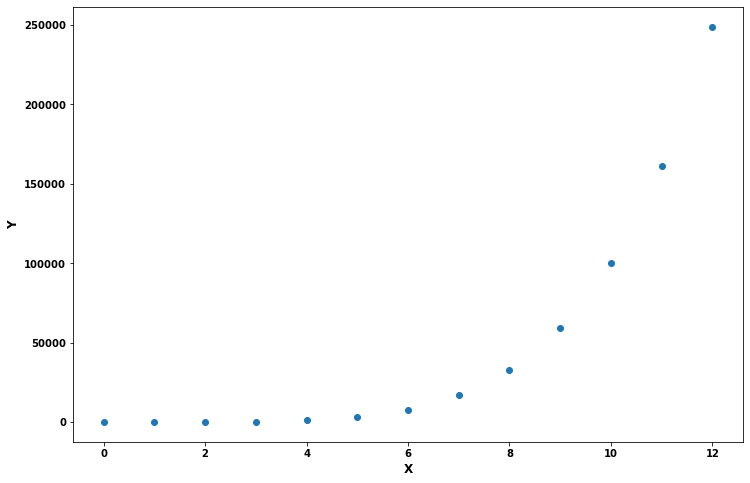

In [17]:
# Create a plot to visualize Data Set 1 with 3rd and 4th degree polynomial fit
fig, ax = plt.subplots(figsize=(12,8))

# create x values for plot
x = np.linspace(min(x2), max(x2), 100)


# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)


# Plot Data Set 1 points:
ax.scatter(x2, y2, label="Data Set 2");

# Plot bi-quadratic function fit for Data Set 1:
ax.plot(x, np.polyval(params4, x), 'g--',
        label='Bi-quadratic function: $y={:.2f}x^4{:.2f}x^3+{:.2f}x^2{:.2f}x+{:.2f}$'.format(params4[0], params4[1], params4[2], params4[3], params4[4])
       );

# Plot bi-quadratic function fit for Data Set 1:
ax.plot(x, popt[0] * np.exp(popt[1] * x) + popt[2], 'r-',
        label="Exponential function: $y=({:.2})*exp({:.2}x) {:.2}$".format(popt[0], popt[1], popt[2])
       );

# Add the legend
plt.legend(loc='upper center');

From the plot above it's clearly visible that the bi-qadratic function is a better fit for Data Set 2 than the exponential function. Therefore, the final function to fit Data Set 2 is: $y=30.00x^4-315.08x^3+1350.55x^2-1997.92x+353.09$

# External References

[[1] Introduction to NumPy polyfit](https://www.educba.com/numpy-polyfit) <br>
[[2] NumPy Polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)<br>
[[3] Curve Fitting in Python: Exponential Functions](https://rowannicholls.github.io/python/curve_fitting/exponential.html )

# End